# Exploratory Data Analysis (EDA)<a id='3_Exploratory_Data_Analysis'></a>

## Introduction<a id='3.1_Introduction'></a>

For the problem idenfication and data wrangling phase, please refer the last notebook here at <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_DataWrangling.ipynb" target="_blank">Financial Frauds Problem Identification and Data Wrangling Notebook</a>.

The main focus for this notebook is solely on exploring and getting the insights from the data.

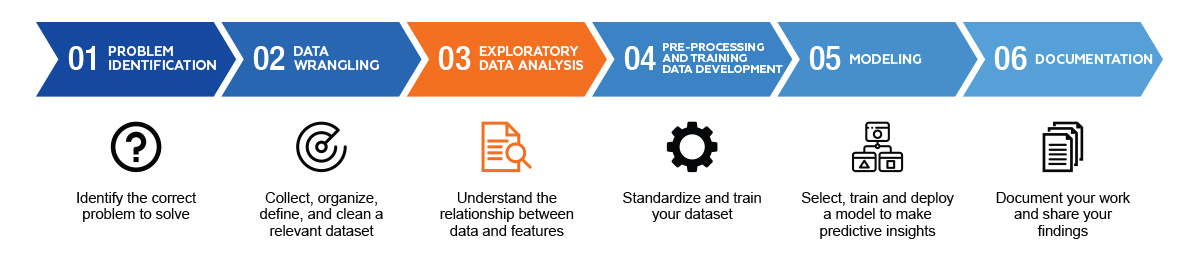

## Imports<a id='3.2_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from library.sb_utils import save_file

# dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ignoring warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading the Data<a id='3.3_Loading_Data'></a>

In [2]:
# Loading the saved data from the previous step
data = pd.read_csv('../FinancialFraudDetection/data/data_eda.csv')

In [3]:
# Checking the data again to ensure the quality from the previous data wrangling phase
print(data.shape)
print(data.info())

(6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   index           int64  
 1   step            int64  
 2   type            object 
 3   amount          float64
 4   nameOrig        object 
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   nameDest        object 
 8   oldbalanceDest  float64
 9   newbalanceDest  float64
 10  isFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


## Explore The Data<a id='3.4_Explore_The_Data'></a>

### Feature Description<a id='3.4.1_Feature_Description'></a>

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

### Data Visualization<a id='3.4.2_Data_Visualization'></a>

Text(0, 0.5, 'Count')

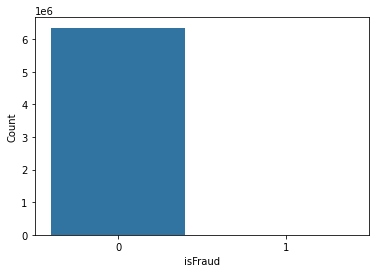

In [11]:
# Checking for the countplot for the data for fraud vs genuine transactions

p = sns.countplot(data=data, x='isFraud')
plt.ylabel("Count")

In [12]:
# Finding the percentage of frauds
data.isFraud.value_counts(normalize=True)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

This means for every 1000 genuine transactions, there may be 1.29 potential fraud transactions.

In [13]:
# During the data wrangling phase, it was found out that frauds are related to 'TRANSFER' and 'CASH_OUT'
data.groupby('type')['isFraud'].sum()

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

[(0.0, 2000000.0)]

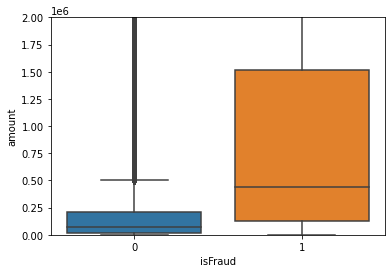

In [21]:
# Box plot for the transaction amounts with 'isFraud' feature on the x-axis
p = sns.boxplot(data=data, x='isFraud', y='amount')
p.set(ylim=(0,2000000))

It seems that fradulent transactions involve higher amounts.

In [24]:
# Checking the transactions for genuine ones first
data[data.isFraud==0].amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [25]:
# Checking the transactions for fraud ones now
data[data.isFraud==1].amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

The mean value for the fradulent transaction is way higher than the mean value of the genuine ones.

[(-10000.0, 2000000.0)]

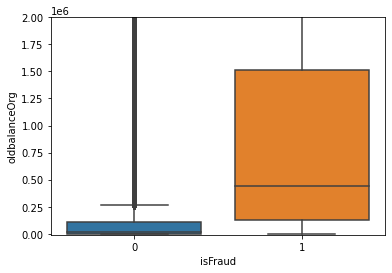

In [29]:
# As frauds are related to transfers and cash outs, I am going to focus on the origin transaction now.
p = sns.boxplot(data=data, x='isFraud', y='oldbalanceOrg')
p.set(ylim=(-10000,2000000))

[(0.0, 6000000.0)]

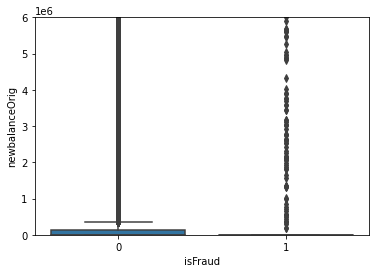

In [33]:
# Plotting the box plot for the new balance at the origin
p = sns.boxplot(data=data, x='isFraud', y='newbalanceOrig')
p.set(ylim=(0,6000000))

Since the amounts involved for the fraud are high numbers, I will take the log values to plot the box plot.

In [34]:
# Taking log values for various features involved with the transfer and cash out transactions
data['amount'] = np.log1p(data['amount'])
data['oldbalanceOrg'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest'] = np.log1p(data['newbalanceDest'])
data.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0
1,1,1,PAYMENT,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0
2,2,1,TRANSFER,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1
3,3,1,CASH_OUT,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1
4,4,1,PAYMENT,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0


### Data Insights<a id='3.4.3_Data_Insights'></a>

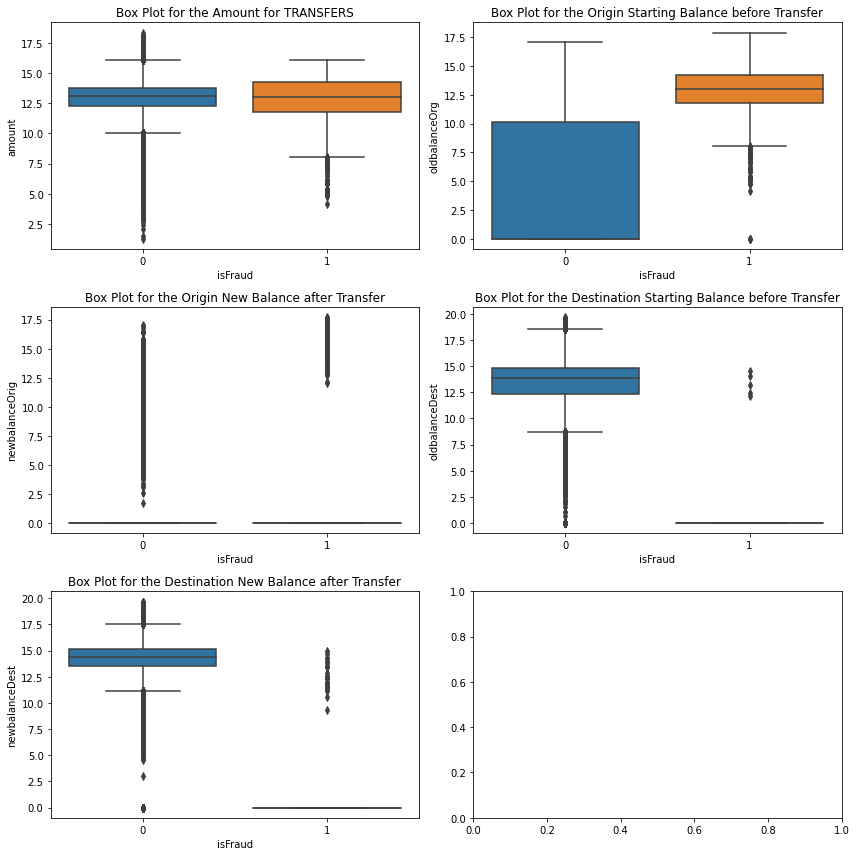

In [39]:
# Plotting box plots for the 'TRANSFER' type transactions
fig, axs = plt.subplots(3, 2, figsize=(12,12))
data_transfer = data.loc[data.type=='TRANSFER']

a = sns.boxplot(data=data_transfer, x='isFraud', y='amount', ax=axs[0][0])
a.set_title("Box Plot for the Transfer Amounts")
b = sns.boxplot(data=data_transfer, x='isFraud', y='oldbalanceOrg', ax=axs[0][1])
b.set_title("Box Plot for the Origin Starting Balance before Transfer")
c = sns.boxplot(data=data_transfer, x='isFraud', y='newbalanceOrig', ax=axs[1][0])
c.set_title("Box Plot for the Origin New Balance after Transfer")
d = sns.boxplot(data=data_transfer, x='isFraud', y='oldbalanceDest', ax=axs[1][1])
d.set_title("Box Plot for the Destination Starting Balance before Transfer")
e = sns.boxplot(data=data_transfer, x='isFraud', y='newbalanceDest', ax=axs[2][0])
e.set_title("Box Plot for the Destination New Balance after Transfer")
plt.tight_layout()
plt.show()

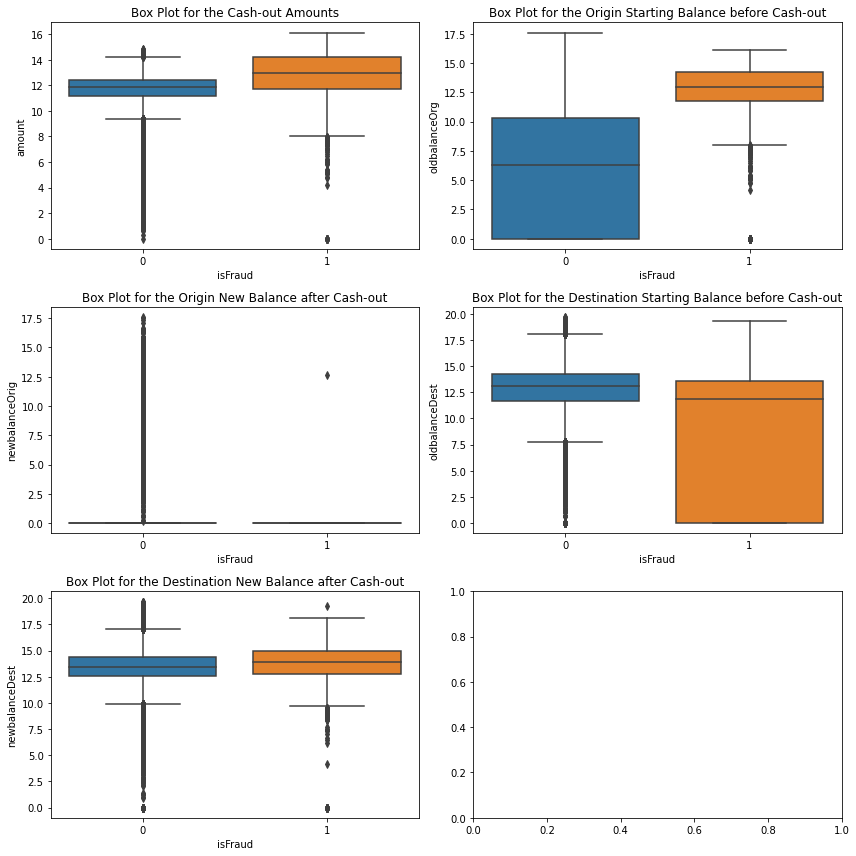

In [40]:
# Plotting box plots for the 'CASH_OUT' type transactions
fig, axs = plt.subplots(3, 2, figsize=(12,12))
data_cashout = data.loc[data.type=='CASH_OUT']

a = sns.boxplot(data=data_cashout, x='isFraud', y='amount', ax=axs[0][0])
a.set_title("Box Plot for the Cash-out Amounts")
b = sns.boxplot(data=data_cashout, x='isFraud', y='oldbalanceOrg', ax=axs[0][1])
b.set_title("Box Plot for the Origin Starting Balance before Cash-out")
c = sns.boxplot(data=data_cashout, x='isFraud', y='newbalanceOrig', ax=axs[1][0])
c.set_title("Box Plot for the Origin New Balance after Cash-out")
d = sns.boxplot(data=data_cashout, x='isFraud', y='oldbalanceDest', ax=axs[1][1])
d.set_title("Box Plot for the Destination Starting Balance before Cash-out")
e = sns.boxplot(data=data_cashout, x='isFraud', y='newbalanceDest', ax=axs[2][0])
e.set_title("Box Plot for the Destination New Balance after Cash-out")
plt.tight_layout()
plt.show()

Cash-out is the transaction where a customer is transferring money to a merchant for the purpose of siphoning off money from the account to make it look a legitimate transaction. As it is expected the above box plots confirm that after the cash-out, the starting balance comes down significantly and it increases on the destination account.

In [41]:
# Saving the EDA phase data into a new datafile for further use in the Data Preprocessing notebook
datapath = '../FinancialFraudDetection/data'
save_file(data, 'data_pre.csv', datapath)

Writing file.  "../FinancialFraudDetection/data\data_pre.csv"


### EDA Summary<a id='3.4.4_EDA_Summary'></a>

As the focus of this project is on finding out the fraudulent transactions without impacting the genuine transactions, the steps followed were as follow:

- Understanding the 'isFraud' feature transactions against the overall transactions
- Analyzed the need of the 'isFlaggedFraud' feature and it was dropped as it was not adding any value.
- Generated box plots for genuine transactions vs fraud transactions for various features
- Due to imbalance between the transaction amounts of genuine and fraud ones, log amounts were taken to smooth out the box plots to generate better data insights

In the next phase of data preprocessing and training of data development, I will continue gaining more insights as well as focus on the feature developments and making data good for various machine learning models.

For the next Preprocessing phase, click here for the notebook.